In [1]:
#Importing the library
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shirinmandapati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
dataset = pd.read_csv('Desktop/WELFake_Dataset.csv')

In [4]:
dataset= dataset[0:20000]

In [5]:
dataset

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
19995,19995,Former Nazi death camp guard charged with acce...,FRANKFURT (Reuters) - German public prosecutor...,0
19996,19996,Conservatives Raise Hell Over Obama’s Wedding...,Those wacky conservatives are at it again with...,1
19997,19997,Round I in Iowa: Scott Walker Emerges,Scott Walker 2016 begins today. After this spe...,0
19998,19998,Exclusive: U.S. plans new wave of immigrant de...,WASHINGTON (Reuters) - U.S. immigration offici...,0


# Preprocessing the dataset

In [6]:
# shape of the dataset

dataset.shape

(20000, 4)

In [7]:
# viewing first few rows of the dataset

dataset.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [8]:
# checking for missing values

dataset.isnull().sum()

Unnamed: 0      0
title         123
text           11
label           0
dtype: int64

In [9]:
# replacing null values with empty string

dataset = dataset.fillna("")

In [10]:
dataset

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
19995,19995,Former Nazi death camp guard charged with acce...,FRANKFURT (Reuters) - German public prosecutor...,0
19996,19996,Conservatives Raise Hell Over Obama’s Wedding...,Those wacky conservatives are at it again with...,1
19997,19997,Round I in Iowa: Scott Walker Emerges,Scott Walker 2016 begins today. After this spe...,0
19998,19998,Exclusive: U.S. plans new wave of immigrant de...,WASHINGTON (Reuters) - U.S. immigration offici...,0


In [11]:
#combine title and text
dataset['content'] = dataset['title'] + ' ' + dataset['text']

In [12]:
print(dataset['content'])

0        LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1           Did they post their votes for Hillary already?
2        UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3        Bobby Jindal, raised Hindu, uses story of Chri...
4        SATAN 2: Russia unvelis an image of its terrif...
                               ...                        
19995    Former Nazi death camp guard charged with acce...
19996     Conservatives Raise Hell Over Obama’s Wedding...
19997    Round I in Iowa: Scott Walker Emerges Scott Wa...
19998    Exclusive: U.S. plans new wave of immigrant de...
19999     Flint’s Mayor Knows Which Candidate Has Their...
Name: content, Length: 20000, dtype: object


# Stemming

In [13]:
#stemming is neccessary in order remove the excessive noise in the datasets
port_stem = PorterStemmer()

In [14]:
# stemming function
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
# applying stemming function
dataset['content'] = dataset['content'].apply(stemming)

In [16]:
# viewing content after stemming
print(dataset['content'])

0        law enforc high alert follow threat cop white ...
1                                post vote hillari alreadi
2        unbeliev obama attorney gener say charlott rio...
3        bobbi jindal rais hindu use stori christian co...
4        satan russia unv imag terrifi new supernuk wes...
                               ...                        
19995    former nazi death camp guard charg accessori m...
19996    conserv rais hell obama wed ring dumbest consp...
19997    round iowa scott walker emerg scott walker beg...
19998    exclus u plan new wave immigr deport raid wash...
19999    flint mayor know candid back make glow endors ...
Name: content, Length: 20000, dtype: object


In [26]:
#separating data and label

X = dataset['content'].values
Y= dataset['label'].values

In [27]:
X

array(['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video comment expect barack obama member fyf fukyoflag blacklivesmatt movement call lynch hang white peopl cop encourag other radio show tuesday night turn tide kill white peopl cop send messag kill black peopl america one f yoflag organ call sunshin radio blog show host texa call sunshin f ing opinion radio show snapshot fyf lolatwhitefear twitter page p show urg support call fyf tonight continu dismantl illus white snapshot twitter radio call invit fyf radio show air p eastern standard time show caller clearli call lynch kill white peopl minut clip radio show heard provid breitbart texa someon would like refer hannib alreadi receiv death threat result interrupt fyf confer call unidentifi black man said mother f ker start f ing like us bunch ni er takin one us roll said caus alreadi roll gang anyway six seven black mother f cker see white person lynch ass let turn tabl conspir cop start lose peopl state

In [28]:
# converting textual data to numerical data

vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [29]:
print(X)

  (0, 84557)	0.025672368273997645
  (0, 84522)	0.021328685981468712
  (0, 84415)	0.12280664542545672
  (0, 84221)	0.044190597441787785
  (0, 83236)	0.019786315734036084
  (0, 82719)	0.03364887609859938
  (0, 82488)	0.023284237780893773
  (0, 82318)	0.14596511350182267
  (0, 82196)	0.025439846750978826
  (0, 81939)	0.01412209292542166
  (0, 81784)	0.022868619630963646
  (0, 81645)	0.013401687589991364
  (0, 81565)	0.0589649335838173
  (0, 81405)	0.0343127913458304
  (0, 81301)	0.054796479835235216
  (0, 80306)	0.030357682780029215
  (0, 80168)	0.05091014317670827
  (0, 79314)	0.0332458865830848
  (0, 79162)	0.042604037399474826
  (0, 79121)	0.022396799981526338
  (0, 79052)	0.02911934107065803
  (0, 79034)	0.032920736719534265
  (0, 78462)	0.0326879150938389
  (0, 78452)	0.03653522684809661
  (0, 77998)	0.042045622970585804
  :	:
  (19999, 13741)	0.18673758180998637
  (19999, 13568)	0.0349912849942122
  (19999, 13408)	0.07877812463845678
  (19999, 12819)	0.06085700642394503
  (19999, 11

# Single Word Cloud

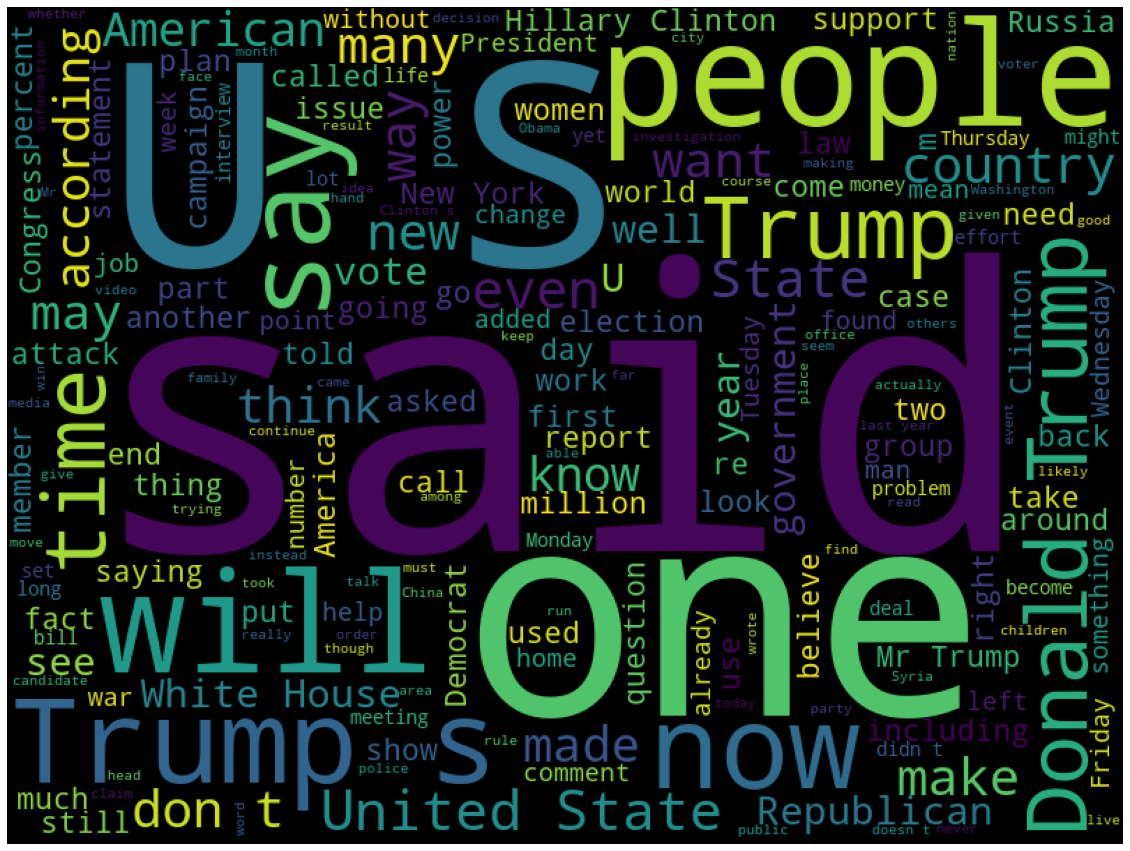

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the news
text_cloud = wordcloud.generate(' '.join(dataset['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

# Data Splitting to train and test 

In [22]:
# splitting data to training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
X_train

<16000x85677 sparse matrix of type '<class 'numpy.float64'>'
	with 3055632 stored elements in Compressed Sparse Row format>

In [24]:
Y_test

array([0, 0, 1, ..., 1, 1, 1])

In [25]:
Y_train

array([0, 0, 0, ..., 0, 1, 1])

In [26]:
X_test

<4000x85677 sparse matrix of type '<class 'numpy.float64'>'
	with 747252 stored elements in Compressed Sparse Row format>

# Model training using Logistic regression

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, Y_train)

LogisticRegression()

In [29]:
# accuracy score on training data
X_train_predictions = model.predict(X_train)
accuracy_training_data = accuracy_score(X_train_predictions, Y_train)
print(f"Accuracy score for training data: {accuracy_training_data}")

Accuracy score for training data: 0.9551875


In [30]:
# accuracy score on test data
X_test_predictions = model.predict(X_test)
accuracy_test_data = accuracy_score(X_test_predictions, Y_test)
print(f"Accuracy score for test data: {accuracy_test_data}")

Accuracy score for test data: 0.92875


# To build a predictive system for logistic regression

In [40]:
# Build a Simple Predictive System

'''
index = int(input("Enter article number to be verified: "))
^ To get article number as input from user
'''

X_new = X_test[1]
new_predict = model.predict(X_new)
if(new_predict[0]==0):
    print("The News is fake")
else:
    print("The News is real")

The News is real


In [69]:
print(Y_test[1])

0


# Classification report for logistic regression

In [43]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_predictions))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1918
           1       0.92      0.94      0.93      2082

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



# Classification Model: Multinomial Naive Bayes

In [45]:
#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [46]:
#testing and training the models seperately
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [47]:
X1_train

<13400x85677 sparse matrix of type '<class 'numpy.float64'>'
	with 2545395 stored elements in Compressed Sparse Row format>

In [53]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [54]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X1_train, Y1_train)
prediction1 = classifier.predict(X1_test)
score = metrics.accuracy_score(Y1_test, prediction1)
print("accuracy:   %0.3f" % score)


accuracy:   0.858


Confusion matrix, without normalization


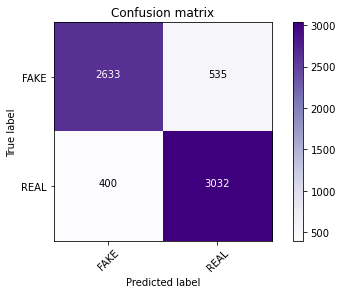

In [55]:
cm1 = metrics.confusion_matrix(Y1_test, prediction1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])
plt.show()

# Predictive system for Multinomial Naive Bayes

In [62]:
X1_new = X1_test[3000]

prediction = model.predict(X1_new)
print(prediction)

if (prediction[0]==0):
  print('The news is fake')
else:
  print('The news is real')

[0]
The news is fake


In [66]:
print(Y1_test[3000])

0


# Classification report for Multinomial Naive Bayes

In [59]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test,prediction1))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      3168
           1       0.85      0.88      0.87      3432

    accuracy                           0.86      6600
   macro avg       0.86      0.86      0.86      6600
weighted avg       0.86      0.86      0.86      6600



# Passive Agressive classifier

In [60]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.33, random_state=42)

accuracy:   0.940
Confusion matrix, without normalization


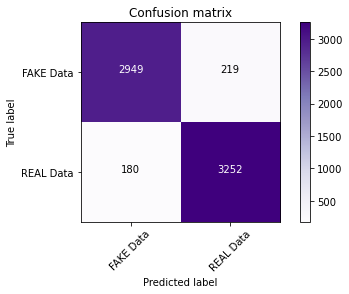

In [61]:
#lets implemet the algorithm : Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

linear_clf.fit(X2_train, Y2_train)
prediction2 = linear_clf.predict(X2_test)
score = metrics.accuracy_score(Y2_test, prediction2)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y2_test, prediction2)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

# predictive system for passive agressive classifier

In [64]:
X2_new = X2_test[1000]

prediction = model.predict(X2_new)
print(prediction)

if (prediction[0]==0):
  print('The news is fake')
else:
  print('The news is real')

[0]
The news is fake


In [65]:
print(Y2_test[1000])

0


# Classification report for Passive agressive classifier

In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y2_test,prediction2))


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3168
           1       0.94      0.95      0.94      3432

    accuracy                           0.94      6600
   macro avg       0.94      0.94      0.94      6600
weighted avg       0.94      0.94      0.94      6600



# Random forest classifier

In [103]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify=Y)

In [104]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=1000,
                                 random_state=1,
                                 n_jobs=2)

In [105]:
# Fit the model
forest.fit(X3_train, Y3_train)

RandomForestClassifier(n_estimators=1000, n_jobs=2, random_state=1)

In [106]:
# Measure model performance
Y_pred = forest.predict(X3_test)


In [107]:
Y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [108]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(Y3_test, Y_pred)))


Model accuracy score with 100 decision-trees : 0.9158


accuracy:   0.916
Confusion matrix, without normalization


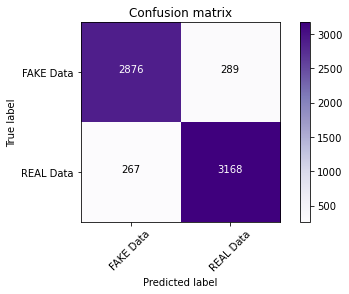

In [109]:
# CONFUSION MATRIX
score = metrics.accuracy_score(Y3_test, Y_pred)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y3_test, Y_pred)
plot_confusion_matrix(cm2, classes=['FAKE Data', 'REAL Data'])

#  predictive system for random forest classifier

In [115]:
X3_new = X3_test[100]

prediction = model.predict(X3_new)
print(prediction)

if (prediction[0]==0):
  print('The news is FAKE')
else:
  print('The news is REAL')

[1]
The news is REAL


In [116]:
print(Y3_test[100])

1


# Classification report for random forest classifier

In [114]:
from sklearn.metrics import classification_report

print(classification_report(Y3_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3165
           1       0.92      0.92      0.92      3435

    accuracy                           0.92      6600
   macro avg       0.92      0.92      0.92      6600
weighted avg       0.92      0.92      0.92      6600

